#Trabajo Práctico N° 5: Transformada de Fourier

El objetivo de este TP es implementar un aplicativo que permita la generación de la Transformada de Fourier (TF) directa e Inversa de Imágenes, este debe permitir:
* Cargar una imagen
* Generar la TF directa de la imagen y ver su espectro
* A partir del espectro generado mediante la TF inversa obtener la imagen
* Debe permitir guardar el espectro de amplitud de una imagen en un bitmap
* Debe permitir cargar el espectro de imagen a partir de un bitmap

Para esto se deben hacer pruebas con diferentes figuras geométricas (Cuadrados, rectángulos, círculos, elipses, rombos, dos o más objetos, etc.) (mostrar los espectros de mínimo 5 figuras diferentes).

Adicionalmente con una imagen de su elección guardar el espectro de amplitud de la imagen en un bitmap, luego editarlo con un editor gráfico (por ejemplo, Paint), cargarlo al aplicativo y finalmente aplicar la transformada inversa (preservando la fase) para ver los efectos.

Nota: se sugiere usar los widgets tipo botón para ejecutar las operaciones mencionadas y que el aplicativo interactivo tengas todas las funciones en el mismo entorno.

Por favor revisar cuidadosamente los videos de la teoría donde se explica cuidadosamente todas las características que se desea tenga el aplicativo.

In [ ]:
import numpy as np
import imageio
from matplotlib import pyplot as plt

# Rectangle: https://bigtime.ch/3641-tm_large_default/vinylfolie-schwarz-matt-plotterfolie.jpg
# Triangle: https://www.pmlive.com/__data/assets/image/0008/451799/MHRA_black_triangle_symbol.jpg
# Circle: https://th.bing.com/th/id/R.cd90511b350a9110ecddb5482db2ba9e?rik=Q5XxzksmrMtVAQ&riu=http%3a%2f%2fs3.amazonaws.com%2fstatic.graphemica.com%2fglyphs%2fi500s%2f000%2f012%2f613%2foriginal%2f25CF-500x500.png%3f1275331433&ehk=MHzbd5Qs8lUJExIaXsD08wcK3y2cexoET2TvKEhoM2k%3d&risl=&pid=ImgRaw&r=0&sres=1&sresct=1
# Small circle: https://lh6.googleusercontent.com/proxy/HrM-0eRei2rlEHVT6ZXQGE1xRwhNZyMKDdrfWBMWNdsrYKj1HPLqhClcgYY41UmnlJ9U8ZZE-A2ADmoXDR0dOsiq0Yx9ajS1vArxzWp8sIiHn5XcVO-_0mjdtH3HFd1Y55TLhxLODrJ1mP8Z6TlYlw=w1200-h630-p-k-no-nu
# Old photo: https://akvis.com/img/examples/retoucher/man-photoshop/source.jpg
# Georg Cantor: https://elementy.ru/images/bookclub/styuart_znachimye_figury_img01_582.jpg
# Honeycomb: https://th.bing.com/th/id/OIP.GhC5EXVncgqku4XFaqPl9gHaHa?pid=ImgDet&rs=1


In [ ]:
#FOURIER TRANSFORM
def FT_spectrum(img):
  dims = img.shape
  if (len(dims) > 2):
    img_ft = np.fft.fftshift(np.fft.fft2(np.clip(img[:, :, 0] / 255., 0., 1.)))
  else:
    img_ft = np.fft.fftshift(np.fft.fft2(np.clip(img / 255., 0., 1.)))
  
  return np.uint8(np.floor(np.log(np.abs(img_ft) + 1.))), np.angle(img_ft) #ABSOLUTE VALUE, PHASE

def IFT_image(ft_img_abs, ft_img_phase):
  rebuilt_img = (np.power(np.e, ft_img_abs) - 1) * (np.cos(ft_img_phase) + np.sin(ft_img_phase) * 1j)
  return np.abs(np.fft.ifft2(np.fft.ifftshift(rebuilt_img)))

<Figure size 432x288 with 0 Axes>

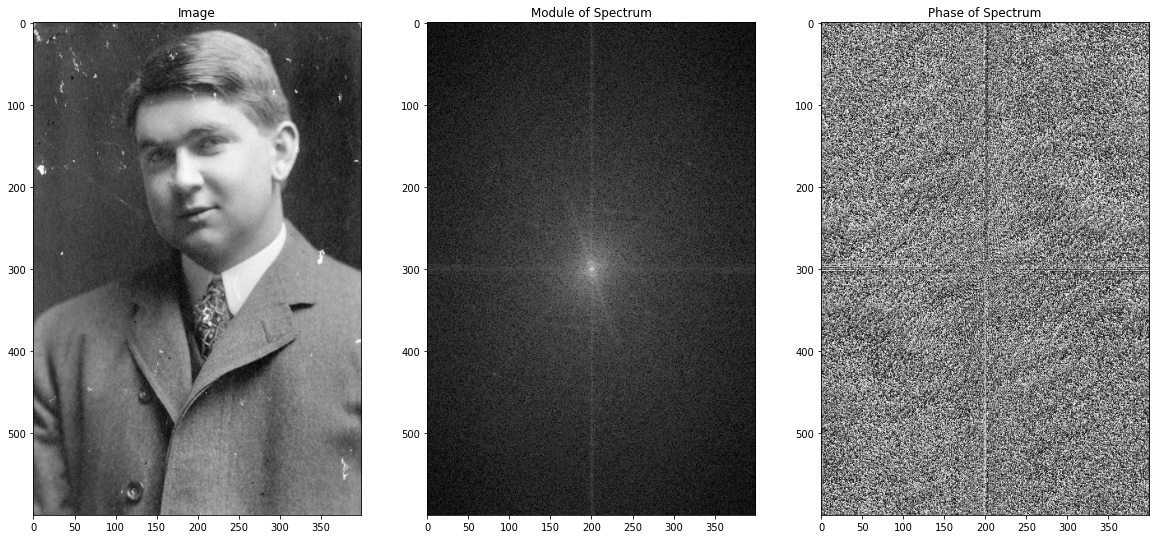

In [ ]:
#@title Upload an image {run:"auto"}
URL = "https://akvis.com/img/examples/retoucher/man-photoshop/source.jpg" #@param {type:"string"}
img = imageio.imread(URL)

#PLOTTING
plt.set_cmap('gray')
fig, ax = plt.subplots(1, 3, figsize=(20, 15))
img_ft_abs, img_ft_phase = FT_spectrum(img)
ax[0].imshow(img)
ax[0].set_title('Image')
ax[1].imshow(img_ft_abs)
ax[1].set_title('Module of Spectrum')
ax[2].imshow(img_ft_phase)
ax[2].set_title('Phase of Spectrum')
plt.show()

In [5]:
#SAVE SPECTRUM
factor = 255 / np.max(img_ft_abs)
imageio.imwrite('img_spectrum_abs.bmp', np.uint8(np.clip(img_ft_abs * factor, 0., 255.)), 'bmp')
imageio.imwrite('img_spectrum_phase.tif', img_ft_phase, 'tif')

En este punto podemos alterar el espectro de la imagen con alguna herramienta de edición de imágenes, como se ve a continuación y tratar de reconstruir la imagen para ver sus efectos.

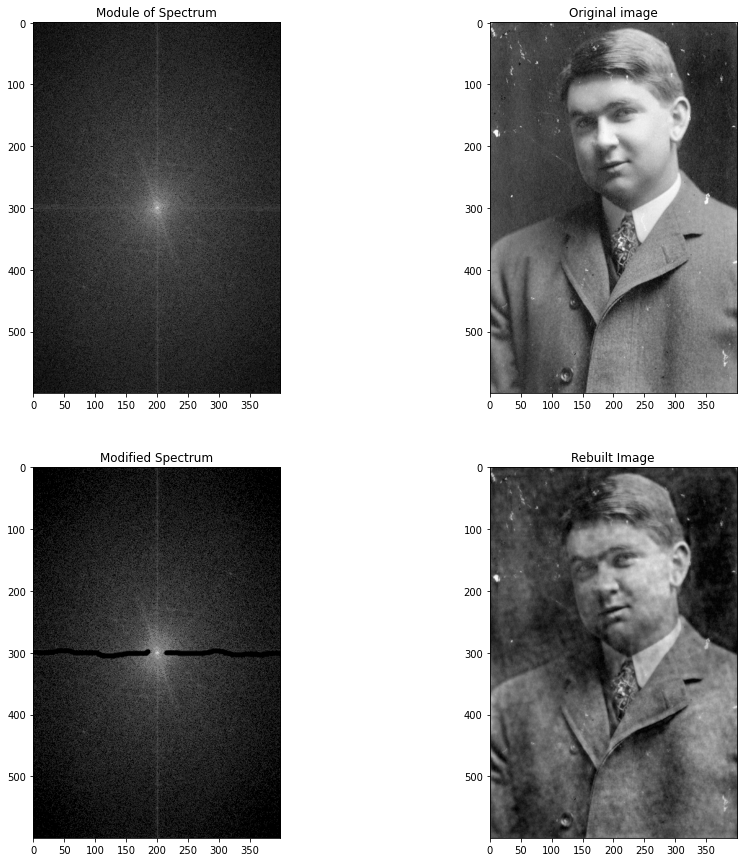

In [8]:
#UPLOAD SPECTRUM
img_spectrum_abs = imageio.imread('img_spectrum_abs_OP.bmp', as_gray=True)
img_spectrum_phase = imageio.imread('img_spectrum_phase.tif')
new_img = IFT_image(img_spectrum_abs / factor, img_spectrum_phase)

#PLOTTING
new_fig, new_ax = plt.subplots(2, 2, figsize=(15, 15))
new_ax[0, 0].imshow(img_ft_abs)
new_ax[0, 0].set_title('Module of Spectrum')
new_ax[0, 1].imshow(img)
new_ax[0, 1].set_title('Original image')
new_ax[1, 0].imshow(img_spectrum_abs)
new_ax[1, 0].set_title('Modified Spectrum')
new_ax[1, 1].imshow(new_img)
new_ax[1, 1].set_title('Rebuilt Image')
plt.show()

Podemos apreciar aquí, con una modificación algo tosca pero efectiva, los efectos que produce cuando se reconstruye la imagen. Aunque resulta difícil describir qué ocurre, la idea básica es que a través del espectro, se pueden alterar la amplitud (intensidad) de determinadas frecuencias (valores de píxeles) para atenuar o resaltar otras características. 